In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [4]:
df = pd.read_csv("workspace_table.csv")
df = pd.read_csv("workspace_table.csv")
data = df.dropna()
print(data.duplicated().any())

data

False


Unnamed: 0       ID  MONTHS_BALANCE STATUS CODE_GENDER FLAG_OWN_CAR  \
31              31  5008806               0      C           M            Y   
32              32  5008806              -1      C           M            Y   
33              33  5008806              -2      C           M            Y   
34              34  5008806              -3      C           M            Y   
35              35  5008806              -4      C           M            Y   
...            ...      ...             ...    ...         ...          ...   
649738      649738  5150487             -25      C           M            Y   
649739      649739  5150487             -26      C           M            Y   
649740      649740  5150487             -27      C           M            Y   
649741      649741  5150487             -28      C           M            Y   
649742      649742  5150487             -29      C           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL NAME_INCOME_TYPE  ...  \
31                   Y             0          112500.0          Working  ...   
32                   Y             0          112500.0          Working  ...   
33                   Y             0          112500.0          Working  ...   
34                   Y             0          112500.0          Working  ...   
35                   Y             0          112500.0          Working  ...   
...                ...           ...               ...              ...  ...   
649738               N             0          202500.0          Working  ...   
649739               N             0          202500.0          Working  ...   
649740               N             0          202500.0          Working  ...   
649741               N             0          202500.0          Working  ...   
649742               N             0          202500.0          Working  ...   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE DAYS_BIRTH  DAYS_EMPLOYED  \
31                Married  House / apartment     -21474          -1134   
32                Married  House / apartment     -21474          -1134   
33                Married  House / apartment     -21474          -1134   
34                Married  House / apartment     -21474          -1134   
35                Married  House / apartment     -21474          -1134   
...                   ...                ...        ...            ...   
649738            Married  House / apartment     -19398          -2166   
649739            Married  House / apartment     -19398          -2166   
649740            Married  House / apartment     -19398          -2166   
649741            Married  House / apartment     -19398          -2166   
649742            Married  House / apartment     -19398          -2166   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  \
31               1                0           0           0   Security staff   
32               1                0           0           0   Security staff   
33               1                0           0           0   Security staff   
34               1                0           0           0   Security staff   
35               1                0           0           0   Security staff   
...            ...              ...         ...         ...              ...   
649738           1                0           0           0          Drivers   
649739           1                0           0           0          Drivers   
649740           1                0           0           0          Drivers   
649741           1                0           0           0          Drivers   
649742           1                0           0           0          Drivers   

       CNT_FAM_MEMBERS  
31                 2.0  
32                 2.0  
33                 2.0  
34                 2.0  
35                 2.0  
...                ...  
649738             2.0  
649739             2.0  
649740             2.0 

In [5]:
print( "Ilość klientów banku: ", data["ID"].nunique())
loan = data[data["STATUS"]!= "X"]
clients_with_loan = loan["ID"].nunique()

print("Ilość klientów banku, mających pożyczkę: ", clients_with_loan)
insolvent3 = data[data["STATUS"]== "3"] # niewypłacalni w grupie 3
print("Ilość klientów niewypłacalnych w grupie 3 : ", len(insolvent3))
insolvent4 = data[data["STATUS"]== "4"] # niewypłacalni w grupie 4
print("Ilość klientów niewypłacalnych w grupie 4 : ", len(insolvent4))
insolvent5 = data[data["STATUS"]== "5"] # niewypłacalni w grupie 5
print("Ilość klientów niewypłacalnych w grupie 5 : ", len(insolvent5))

insolvent = len(insolvent3) + len(insolvent4) + len(insolvent5)
print("Łączna ilość klientów niewypłacalnych: ", insolvent)

insolvent_percentage = print("Procent niewypłacalnych klientów: ", 100*(insolvent/clients_with_loan))

Ilość klientów banku:  25134
Ilość klientów banku, mających pożyczkę:  22737
Ilość klientów niewypłacalnych w grupie 3 :  181
Ilość klientów niewypłacalnych w grupie 4 :  152
Ilość klientów niewypłacalnych w grupie 5 :  1087
Łączna ilość klientów niewypłacalnych:  1420
Procent niewypłacalnych klientów:  6.245327000043981


C:\Users\Hyperbook\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'oś Y')

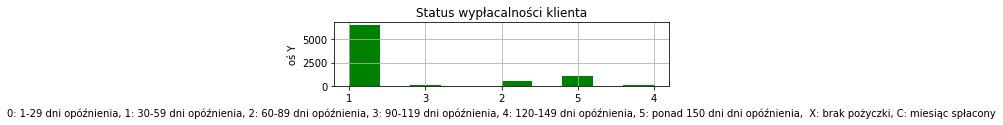

In [6]:
insol = loan[loan["STATUS"]!= "C"][loan["STATUS"]!= "X"][loan["STATUS"]!= "0"]
plt.subplot(3,1,1)
plt.title("Status wypłacalności klienta")
plt.hist(insol["STATUS"], facecolor='g')
plt.grid(True)
plt.rcParams['figure.dpi']= 400
plt.xlabel("0: 1-29 dni opóźnienia, 1: 30-59 dni opóźnienia, 2: 60-89 dni opóźnienia, 3: 90-119 dni opóźnienia, 4: 120-149 dni opóźnienia, 5: ponad 150 dni dni opóźnienia,  X: brak pożyczki, C: miesiąc spłacony")
plt.ylabel("oś Y")

In [8]:
income150 = data[data["AMT_INCOME_TOTAL"]<150000]["ID"].count()
print(income150)
insol150 =  insol[insol["AMT_INCOME_TOTAL"]<150000]["ID"].count()
print(insol150)
print("Przy dochodach do 150 tys. dolarów rocznie, procent niewypłacalnych wynosi: ", 100*(insol150/income150))
insol[["NAME_EDUCATION_TYPE", "STATUS", "ID"]].groupby(by=["STATUS","NAME_EDUCATION_TYPE"]).count()

198274
3011
Przy dochodach do 150 tys. dolarów rocznie, procent niewypłacalnych wynosi:  1.5186055660348812


ID
STATUS NAME_EDUCATION_TYPE                
1      Academic degree                   7
       Higher education               1750
       Incomplete higher               327
       Lower secondary                  51
       Secondary / secondary special  4288
2      Higher education                166
       Incomplete higher                27
       Lower secondary                   5
       Secondary / secondary special   344
3      Higher education                 50
       Incomplete higher                 7
       Lower secondary                   4
       Secondary / secondary special   120
4      Higher education                 35
       Incomplete higher                19
       Lower secondary                   5
       Secondary / secondary special    93
5      Higher education                402
       Incomplete higher                24
       Lower secondary                  35
       Secondary / secondary special   626

In [9]:
income150 = data[data["AMT_INCOME_TOTAL"]<150000]["ID"].count()
print(income150)
insol150 =  insol[insol["AMT_INCOME_TOTAL"]<150000]["ID"].count()
print(insol150)
print("Przy dochodach do 150 tys. dolarów rocznie, procent niewypłacalnych wynosi: ", 100*(insol150/income150))
insol[["NAME_HOUSING_TYPE", "STATUS", "ID"]].groupby(by=["STATUS","NAME_HOUSING_TYPE"]).count()

198274
3011
Przy dochodach do 150 tys. dolarów rocznie, procent niewypłacalnych wynosi:  1.5186055660348812


ID
STATUS NAME_HOUSING_TYPE        
1      Co-op apartment        27
       House / apartment    5621
       Municipal apartment   216
       Office apartment       70
       Rented apartment      104
       With parents          385
2      Co-op apartment         9
       House / apartment     448
       Municipal apartment    31
       Office apartment        6
       Rented apartment        7
       With parents           41
3      Co-op apartment         3
       House / apartment     149
       Municipal apartment    11
       Office apartment        4
       Rented apartment        2
       With parents           12
4      Co-op apartment         2
       House / apartment     122
       Municipal apartment    19
       Office apartment        2
       Rented apartment        1
       With parents            6
5      Co-op apartment        16
       House / apartment     968
       Municipal apartment    36
       Office apartment       14
       Rented apartment       19
       With parents           34

In [12]:
income150 = data[data["AMT_INCOME_TOTAL"]<150000]["ID"].count()
print(income150)
insol150 =  insol[insol["AMT_INCOME_TOTAL"]<150000]["ID"].count()
print(insol150)
print("Przy dochodach do 150 tys. dolarów rocznie, procent niewypłacalnych wynosi: ", 100*(insol150/income150))
insol[["CNT_CHILDREN", "STATUS", "ID"]].groupby(by=["STATUS","CNT_CHILDREN"]).count()


198274
3011
Przy dochodach do 150 tys. dolarów rocznie, procent niewypłacalnych wynosi:  1.5186055660348812


ID
STATUS CNT_CHILDREN      
1      0             4147
       1             1439
       2              732
       3               77
       4               13
       7               10
       14               5
2      0              349
       1              123
       2               50
       3               19
       4                1
3      0              118
       1               44
       2               14
       3                4
       4                1
4      0               92
       1               41
       2               17
       3                1
       4                1
5      0              630
       1              379
       2               71
       3                5
       4                2